In [1]:
import cyecca.lie as lie
import casadi as ca
from cyecca.graph import draw_casadi
import numpy as np
import matplotlib.pyplot as plt
from cyecca.symbolic import casadi_to_sympy

w = ca.SX.sym("w", 3)  # process noise
v = ca.SX.sym("v", 3)  # measurement noise
x = lie.so3.elem(ca.SX.sym("x", 3))  # state
xh = ca.vertcat(1, 0, 0)  # x unit vector
zh = ca.vertcat(0, 0, 1)  # z unit vector


omega = lie.so3.elem(ca.SX.sym("omega", 3))  # angular velocity
qr = lie.SO3Quat.elem(ca.SX.sym("qr", 4))
qe = x.exp(lie.SO3Quat)

A = -omega.ad()
J_r_inv = lie.so3.right_jacobian_inv(x)

x_dot = A @ x.param + J_r_inv @ w

# parameterize measurements in exponential coordinates
y_accel = (qe * qr).inverse() @ zh + v

f_g = ca.Function("g", [x.param, qr.param, v], [y_accel])
H = ca.jacobian(y_accel, x.param)
f_H = ca.Function("H", [x.param, qr.param], [H])

N = ca.jacobian(y_accel, v)

# test
euler0 = lie.SO3EulerB321.elem(ca.vertcat(0.1, 0, 0))
q0 = lie.SO3Quat.from_Euler(euler0)
f_H([0, 0, 0], q0.param)


f_J_r_inv = ca.Function("Jr_inv", [x.param], [J_r_inv])
f_J_r_inv([0, 0, 0])

DM(
[[1, 0, 0], 
 [0, 1, 0], 
 [0, 0, 1]])

In [2]:
decl = ca.SX.sym("decl")
incl = ca.SX.sym("incl")

q_wb = qe * qr

# q_bw = q_wb.inverse()
R_mag = lie.SO3EulerB321.elem(ca.vertcat(decl, incl, 0))
y_mag = qe @ xh  # + v

# y_mag /= ca.norm_2(y_mag)

f_y_mag = ca.Function("y_mag", [x.param, qr.param], [y_mag])

H_mag = ca.jacobian(y_mag, x.param)

f_H_mag = ca.Function("H_mag", [x.param, incl, decl, qr.param], [H_mag])

f_y_mag([0, 0, 0], [1, 0, 0, 0])

f_H_mag([0, 0, 0], 0, 0, [1, 0, 0, 0])

DM(
[[0, 0, 0], 
 [0, 0, 1], 
 [0, -1, 0]])

In [3]:
H_mag

SX(@1=remainder(((sq(x_0)+sq(x_1))+sq(x_2)),39.4784), @2=4, @3=(@1/@2), @4=1e-07, @5=(fabs(@3)<@4), @6=1, @7=-0.5, @8=-0.00138889, @9=sq(@3), @10=-2.75573e-07, @11=sq(@3), @12=sq(@11), @13=0.0416667, @14=2.48016e-05, @15=sq(@3), @16=(!@5), @17=sqrt(@3), @18=((@5?(((((@6+(@7*@3))+(@8*(@3*@9)))+(@10*(@3*@12)))+(@13*sq(@3)))+(@14*sq(@15))):0)+(@16?cos(@17):0)), @19=(@18+@18), @20=0.25, @21=(x_0+x_0), @22=(@20*@21), @23=(@3+@3), @24=(@11+@11), @25=(@3+@3), @26=(@3+@3), @27=(@15+@15), @28=(@3+@3), @29=sin(@17), @30=(@17+@17), @31=((@5?(((((@7*@22)+(@8*((@9*@22)+(@3*(@23*@22)))))+(@10*((@12*@22)+(@3*(@24*(@25*@22))))))+(@13*(@26*@22)))+(@14*(@27*(@28*@22)))):0)+(@16?(-(@29*(@22/@30))):0)), @32=(@1/@2), @33=(fabs(@32)<@4), @34=-0.166667, @35=-0.000198413, @36=sq(@32), @37=-2.50521e-08, @38=sq(@32), @39=sq(@38), @40=0.00833333, @41=2.75573e-06, @42=sq(@32), @43=(!@33), @44=pow(@32,@7), @45=sqrt(@32), @46=sin(@45), @47=2, @48=(((@33?(((((@6+(@34*@32))+(@35*(@32*@36)))+(@37*(@32*@39)))+(@40*sq(@

In [4]:
H_mag

SX(@1=remainder(((sq(x_0)+sq(x_1))+sq(x_2)),39.4784), @2=4, @3=(@1/@2), @4=1e-07, @5=(fabs(@3)<@4), @6=1, @7=-0.5, @8=-0.00138889, @9=sq(@3), @10=-2.75573e-07, @11=sq(@3), @12=sq(@11), @13=0.0416667, @14=2.48016e-05, @15=sq(@3), @16=(!@5), @17=sqrt(@3), @18=((@5?(((((@6+(@7*@3))+(@8*(@3*@9)))+(@10*(@3*@12)))+(@13*sq(@3)))+(@14*sq(@15))):0)+(@16?cos(@17):0)), @19=(@18+@18), @20=0.25, @21=(x_0+x_0), @22=(@20*@21), @23=(@3+@3), @24=(@11+@11), @25=(@3+@3), @26=(@3+@3), @27=(@15+@15), @28=(@3+@3), @29=sin(@17), @30=(@17+@17), @31=((@5?(((((@7*@22)+(@8*((@9*@22)+(@3*(@23*@22)))))+(@10*((@12*@22)+(@3*(@24*(@25*@22))))))+(@13*(@26*@22)))+(@14*(@27*(@28*@22)))):0)+(@16?(-(@29*(@22/@30))):0)), @32=(@1/@2), @33=(fabs(@32)<@4), @34=-0.166667, @35=-0.000198413, @36=sq(@32), @37=-2.50521e-08, @38=sq(@32), @39=sq(@38), @40=0.00833333, @41=2.75573e-06, @42=sq(@32), @43=(!@33), @44=pow(@32,@7), @45=sqrt(@32), @46=sin(@45), @47=2, @48=(((@33?(((((@6+(@34*@32))+(@35*(@32*@36)))+(@37*(@32*@39)))+(@40*sq(@

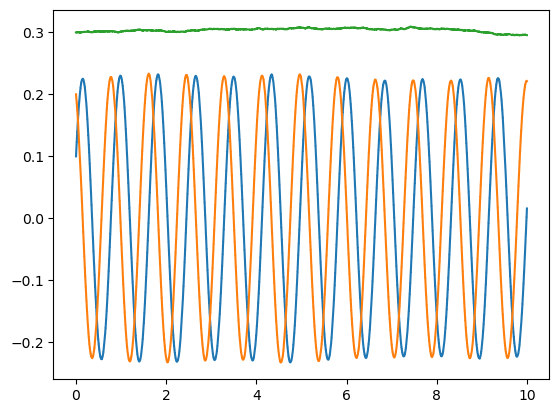

In [5]:
def simulate():
    tf = 10
    dt_control = 1.0 / 250
    dt_noise = 0.001
    dae = {"x": x.param, "p": omega.param, "u": w, "ode": x_dot}
    t_step = np.arange(0, dt_control, dt_noise)
    f_int = ca.integrator("F", "idas", dae, 0, t_step, {})

    t = np.arange(0, tf, dt_control)
    data = {
        "x": [],
        "t": [],
    }

    xi = [0.1, 0.2, 0.3]

    for ti in t:
        res = f_int(x0=xi, p=[0, 0, 10], u=0.1 * np.random.randn(3, len(t_step)))
        data["t"].append(ti + t_step)
        data["x"].append(res["xf"])
        xi = res["xf"][:, -1]
    data["x"] = np.hstack(data["x"])
    data["t"] = np.hstack(data["t"])
    return data


data = simulate()
plt.plot(data["t"], data["x"].T);

In [4]:
import sympy

In [8]:
x = sympy.symbols("x")
y = sympy.sqrt(x) ** 2
y

x